In [1]:
import pandas as pd
import numpy as np
import requests
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import pickle
from statistics import mean, stdev
import os
import seaborn as sns
import matplotlib

In [7]:
os.listdir('vprec_intermediate')

['12_mf.txt',
 'double_16_mf.txt',
 '13_cc.txt',
 'range',
 'double_9_bp.txt',
 'full_bp.txt',
 'double_13_mf.txt',
 'double_21_bp.txt',
 '12_bp.txt',
 '16_bp.txt',
 '13_mf.txt',
 'full_cc.txt',
 '19_mf.txt',
 'double_16_bp.txt',
 'double_11_cc.txt',
 '11_cc.txt',
 '13_bp.txt',
 'double_11_bp.txt',
 '11_mf.txt',
 'double2_10_cc.txt',
 'double_11_mf.txt',
 'double2_10_mf.txt',
 '12_cc.txt',
 '22_cc.txt',
 'double_7_cc.txt',
 'double_19_bp.txt',
 'double_13_bp.txt',
 '11_bp.txt',
 'double_13_cc.txt',
 '16_cc.txt',
 'double_10_mf.txt',
 'double_7_mf.txt',
 'full_mf.txt',
 'double_7_bp.txt',
 'double_19_mf.txt',
 'double2_10_bp.txt',
 'double_21_mf.txt',
 '21_mf.txt',
 'double_9_mf.txt',
 'double_19_cc.txt',
 '21_cc.txt',
 'float_7_mf.txt',
 '22_bp.txt',
 'double_8_bp.txt',
 'double_16_cc.txt',
 'float_7_bp.txt',
 'double_10_cc.txt',
 'double_10_bp.txt',
 'double_8_mf.txt',
 '16_mf.txt',
 '21_bp.txt',
 'double_8_cc.txt',
 '22_mf.txt',
 'float_7_cc.txt',
 '19_bp.txt',
 'double_9_cc.txt',
 '

/home/ines/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ines/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ines/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ines/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.

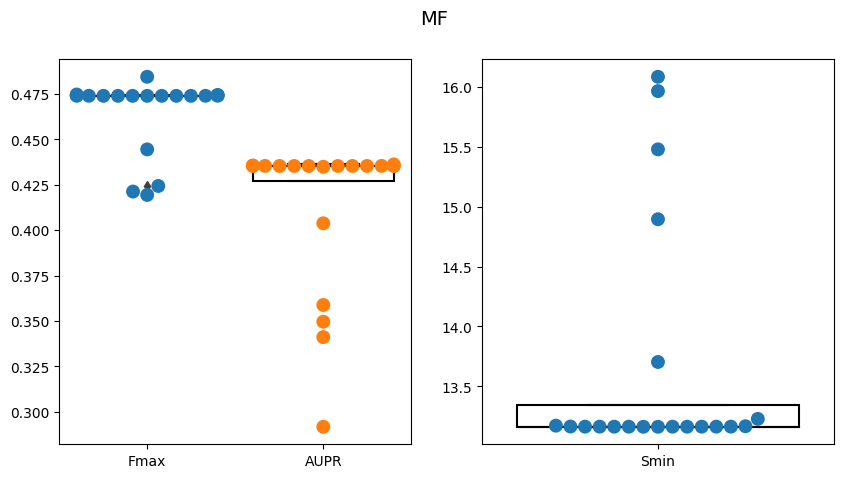

/home/ines/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ines/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ines/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ines/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


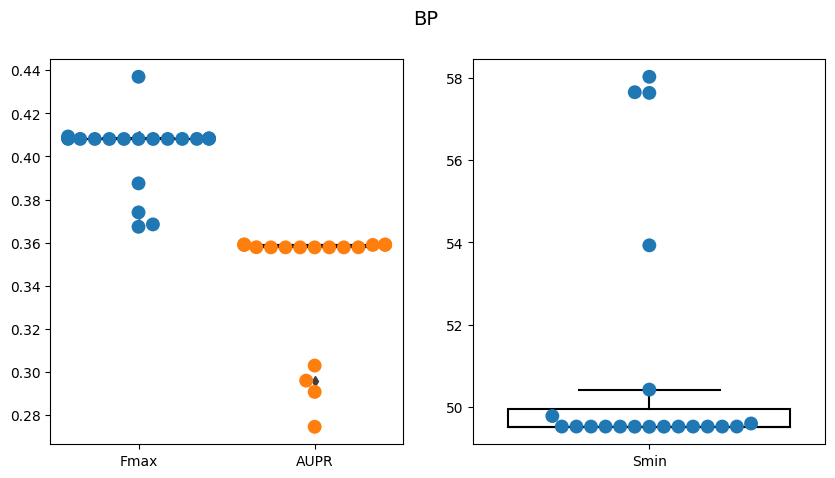

/home/ines/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ines/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ines/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


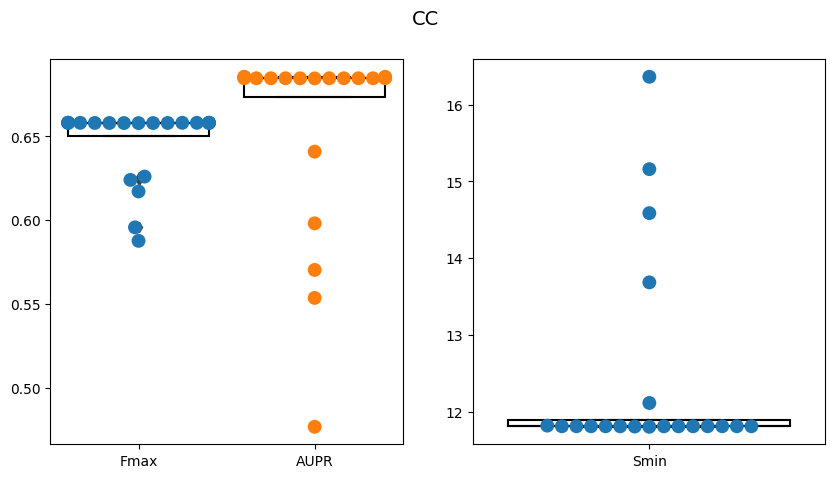

In [9]:
PROPS = {
        'boxprops':{'facecolor':'none', 'edgecolor':'black'},
        'medianprops':{'color':'black'},
        'whiskerprops':{'color':'black'},
        'capprops':{'color':'black'}
    }

#prepopulated with IEEE refs
# intermediate_metrics = {'mf':{'Smin': [13.164216275085776], 'Fmax': [0.4743216271664266], 'AUPR':[0.43561985921167096]}, 
#        'bp': {'Smin': [49.51851294397152], 'Fmax':[0.40838060208161664], 'AUPR': [0.3578813437683871]}, 
#        'cc': {'Smin': [11.807527463104783], 'Fmax': [0.6580120561381912], 'AUPR':[0.6847218412385653]}}
#add double + float set to 23

intermediate_metrics = {'mf':{'Smin': [], 'Fmax': [], 'AUPR':[]}, 
       'bp': {'Smin': [], 'Fmax': [], 'AUPR':[]}, 
       'cc': {'Smin': [], 'Fmax': [], 'AUPR':[]}}


for ont in intermediate_metrics.keys():
    f = open(f'/home/ines/Documents/Thesis/Verrou_corrected/vprec_ob/rerun/23_23_{ont}.txt')
    next(f)
    for row in f:
        metric, score = row.strip().split(': ')
        if metric == 'threshold': continue
        intermediate_metrics[ont][metric].append(np.float64(score))


for file in os.listdir('vprec_intermediate'):

    if 'range' in file: continue
    
    if 'double' in file or 'float' in file:
        ont = file.split('_')[2].split('.')[0]
    else: 
        ont = file.split('_')[1].split('.')[0]
#     if not ont in intermediate_metrics.keys():
#         intermediate_metrics[ont] = {}
    
    file = open(f'vprec_intermediate/{file}')
    
    next(file)
    for row in file:
        metric, score = row.strip().split(': ')
        if metric == 'threshold': continue

#         if metric in intermediate_metrics[ont]:
        # print(ont,metric,score)
        
        intermediate_metrics[ont][metric].append(np.float64(score))
#         else:
#             intermediate_metrics[ont][metric] = [np.float64(score)]

            
for num, ont in enumerate(intermediate_metrics):
    
    fig, ax = plt.subplots(1,2, figsize=(10,5))
#     fig = plt.figure()
#     ax = fig.add_subplot(121)    # The big subplot
#     ax1 = fig.add_subplot(121)
#     ax2 = fig.add_subplot(122)

    
#     for a in ax: a.remove()
    
#     gridspec = ax[0].get_subplotspec().get_gridspec()
#     subfigs = [fig.add_subfigure(gs) for gs in gridspec]

#     for row, subfig in enumerate(subfigs):
#         subfig.suptitle(f'Subfigure title {row}')

#         # create 1x3 subplots per subfig
#         ax = subfig.subplots(nrows=1, ncols=3)


    smin = intermediate_metrics[ont].pop('Smin')
#     del intermediate_metrics[ont]['threshold']


    sns.boxplot(data=pd.DataFrame(intermediate_metrics[ont]), ax=ax[0], **PROPS)
    sns.swarmplot(data=pd.DataFrame(intermediate_metrics[ont]), ax=ax[0], size=10)

    sns.boxplot(data=pd.DataFrame(smin), ax=ax[1], **PROPS)
    sns.swarmplot(data=pd.DataFrame(smin), ax=ax[1], size=10)
    ax[1].set_xticklabels(['Smin'])
    
#     if ont == 'mf':
#         ax[1].set_ylim(16.4,16.5)
#     ax[num].title(ont)

    plt.suptitle(ont.upper(), fontsize=14)


In [46]:
metrics = {}
metric_stats = {}
df_metric = {}

for category in ['bp', 'cc', 'mf']:

    df_metric[category] = {}
    metrics[category] = {}
    metric_stats[category] = {}
        
    # for f1 in [22,21,19,16, 13, 12, 11, 'float_7', 'double_7', 'double_8', 'double_9', 'double2_10', 
    #            'double_11', 'double_13', 'double_16', 'double_19', 'double_21']:
    for f1 in [22,21,19,16, 13, 12, 11, 'float_7', 'double_7', 'double_8', 'double_9', 'double_10', 
               'double_11', 'double_13', 'double_16', 'double_19', 'double_21']:
        

        df_metric[category][f'{f1}'] = {}
        metrics[category][f'{f1}'] = {'threshold':[], 'Smin':[], 'Fmax':[], 'AUPR':[]}
        metric_stats[category][f'{f1}'] = {'threshold':{}, 'Smin':{}, 'Fmax':{}, 'AUPR':{}}
        
        metrics_file = open("vprec_intermediate/%s_%s.txt"%(f1, category)) 
        
        next(metrics_file)
        
        for row in metrics_file:
            metric, score = row.strip().split(': ')
#             if metric == 'threshold': continue

            metrics[category][f'{f1}'][metric].append(np.float64(score))
    
    
        metrics_file = open("vprec_intermediate/full_%s.txt"%category)
#         metrics_file = open("/home/ines/Documents/Thesis/Verrou_corrected/vprec_ob/rerun/23_10_%s.txt"%category)
        next(metrics_file)
        for row in metrics_file:
#             if 'Smin threshold' in row[0] or 'Precision' in row[0] or 'Recall' in row[0] or 'Positive' in row[0] or 'Negative' in row[0] : continue
            metric, score = row.strip().split(': ')

            metric_stats[category][f'{f1}'][metric]['Original Result'] = [np.float64(score)]

        for i in metrics[category][f'{f1}']: 
            metric_stats[category][f'{f1}'][i]['VPREC Results'] = metrics[category][f'{f1}'][i]

            df_metric[category][f'{f1}']['%s'%i] = pd.DataFrame(metric_stats[category][f'{f1}'][i])


## Range 

In [229]:
metrics = {}
metric_stats = {}
df_metric = {}

for category in ['bp', 'cc', 'mf']:

    df_metric[category] = {}
    metrics[category] = {}
    metric_stats[category] = {}
    # for prec in [23]:

    #     for exp in [5,7]:
            
        
    # for f1 in [22,21,19,16, 13, 12, 11, 'float_7', 'double_7', 'double_8', 'double_9', 'double2_10', 
    #            'double_11', 'double_13', 'double_16', 'double_19', 'double_21']:
    for f1 in ['double_7', 'double_8', 'double_9', 'double2_10', 'prec_double_p23_r7', 'prec_double_p23_r6', 'prec_double_p23_r5', 'prec_double_p16_r6', 
              'prec_double_p10_r6', 'prec_double_p9_r6', 'prec_double_p8_r6', 'prec_double_p6_r6']:

        df_metric[category][f'{f1}'] = {}
        metrics[category][f'{f1}'] = {'threshold':[], 'Smin':[], 'Fmax':[], 'AUPR':[]}
        metric_stats[category][f'{f1}'] = {'threshold':{}, 'Smin':{}, 'Fmax':{}, 'AUPR':{}}

        if 'prec' in f1: 
            metrics_file = open(f"vprec_intermediate/range/{f1.split('prec_')[-1]}_{category}.txt")
        else: metrics_file = open(f"vprec_intermediate/{f1}_{category}.txt") 
        
        next(metrics_file)
        
        for row in metrics_file:
            metric, score = row.strip().split(': ')
#             if metric == 'threshold': continue

            metrics[category][f'{f1}'][metric].append(np.float64(score))
    
    
        metrics_file = open("vprec_intermediate/full_%s.txt"%category)
#         metrics_file = open("/home/ines/Documents/Thesis/Verrou_corrected/vprec_ob/rerun/23_10_%s.txt"%category)
        next(metrics_file)
        for row in metrics_file:
#             if 'Smin threshold' in row[0] or 'Precision' in row[0] or 'Recall' in row[0] or 'Positive' in row[0] or 'Negative' in row[0] : continue
            metric, score = row.strip().split(': ')

            metric_stats[category][f'{f1}'][metric]['Original Result'] = [np.float64(score)]

        for i in metrics[category][f'{f1}']: 
            metric_stats[category][f'{f1}'][i]['VPREC Results'] = metrics[category][f'{f1}'][i]

            df_metric[category][f'{f1}']['%s'%i] = pd.DataFrame(metric_stats[category][f'{f1}'][i])


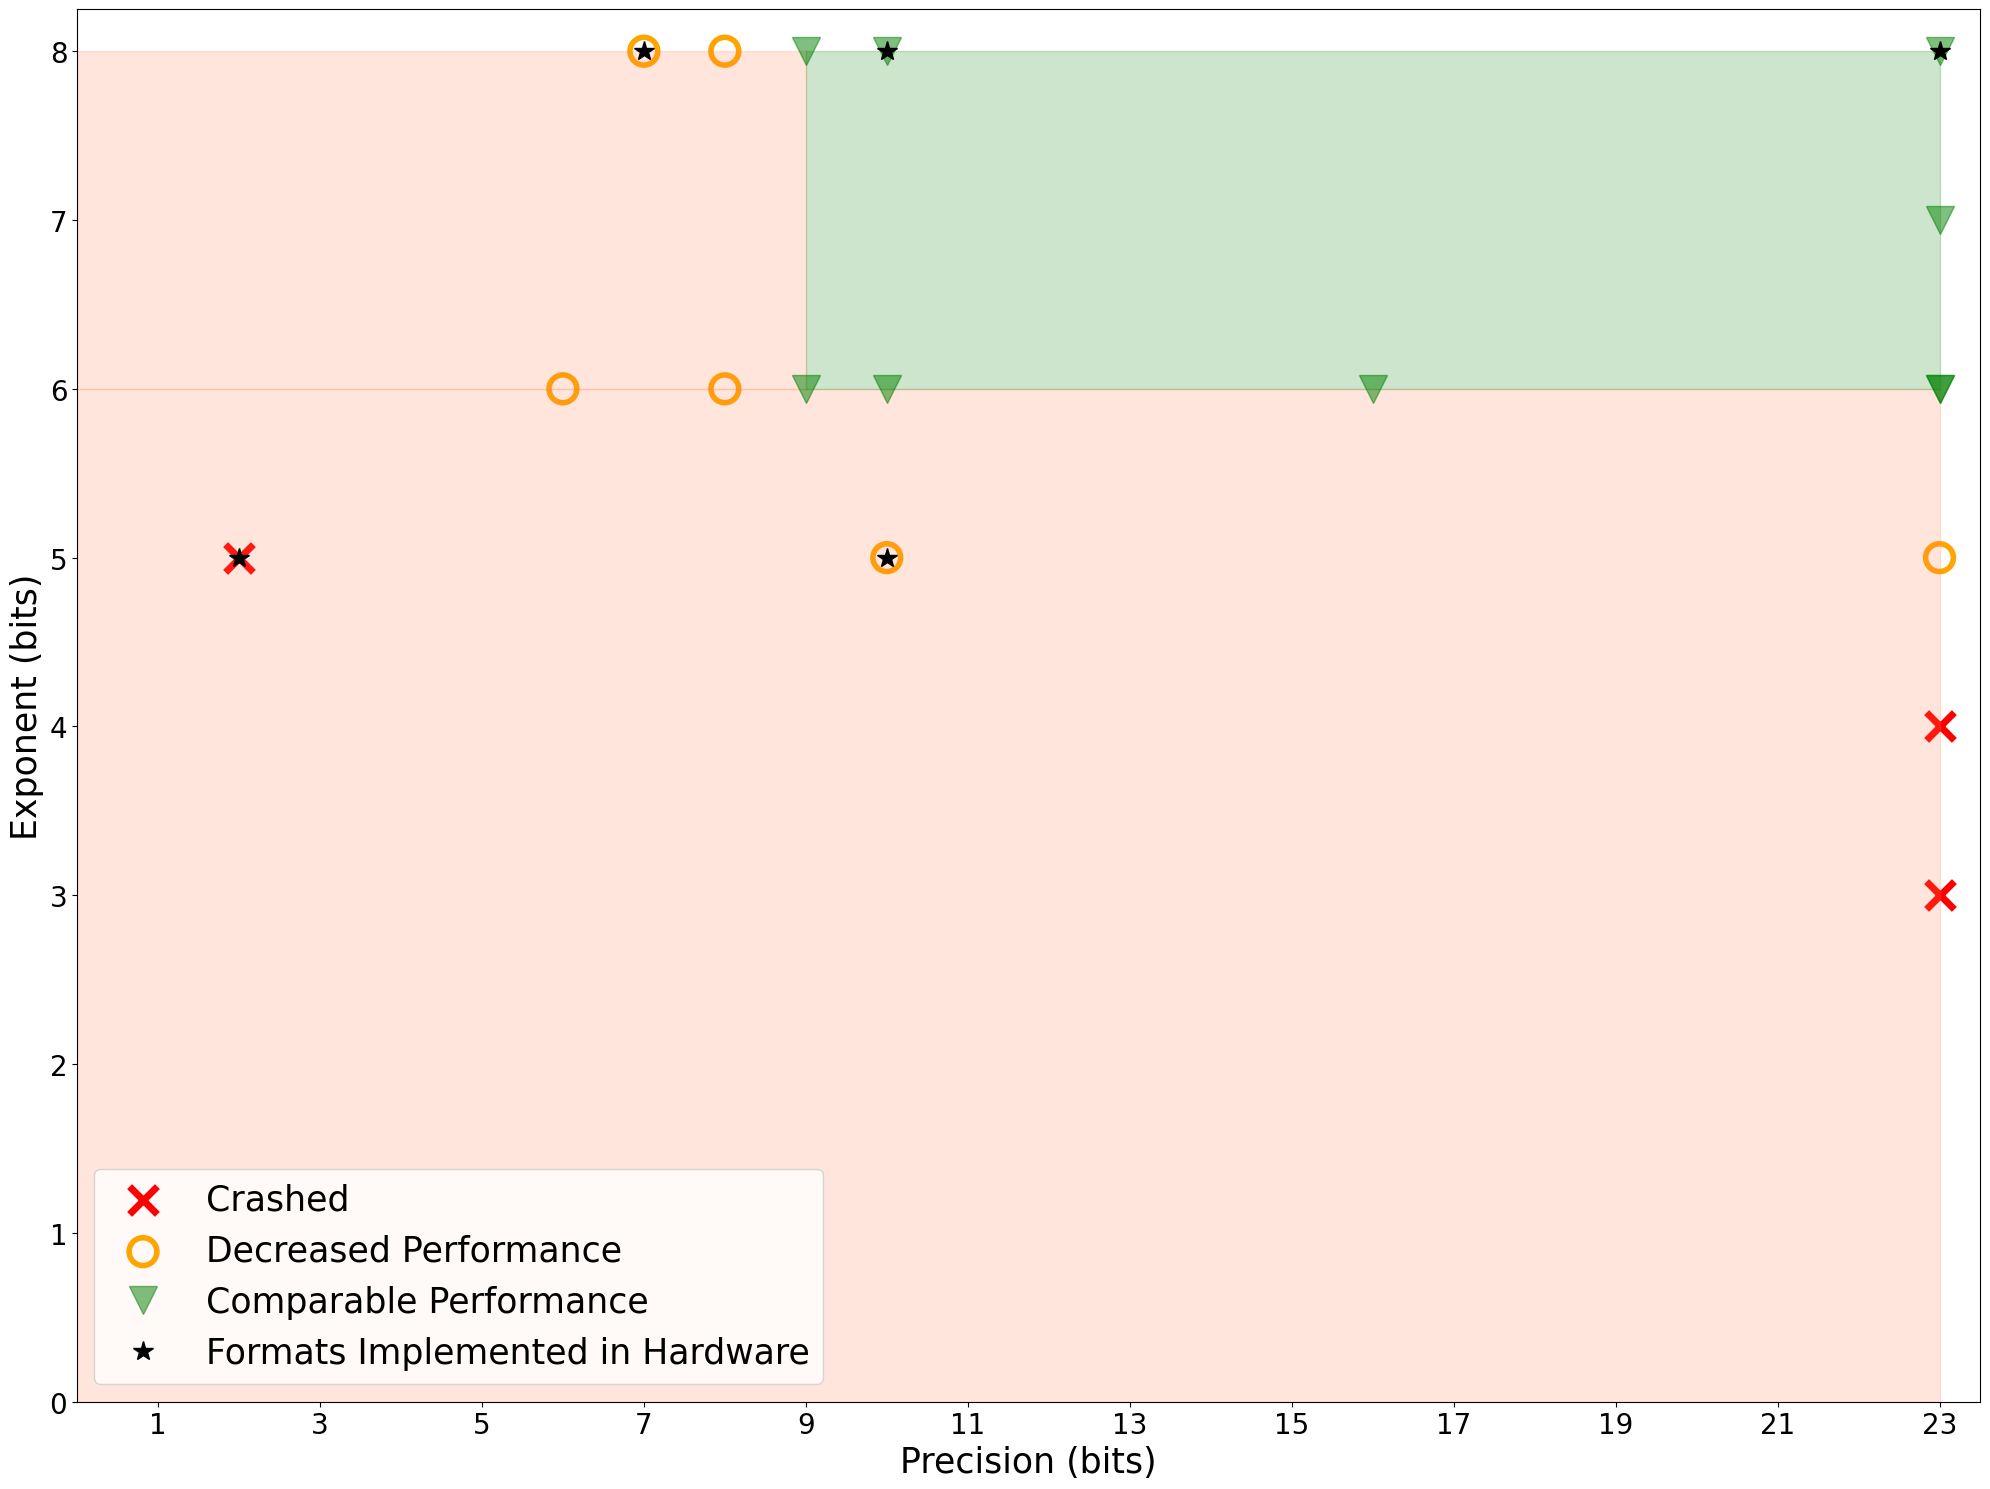

In [280]:
hardware_formats = np.array([[23,10,10,7,2], [8,5,8,8,5]])
prec_search_decrease = np.array([[10,8,8,6,7],[5,8,6,6,8]])
prec_search_success = np.array([[23,16,10,10,9,9],[6,6,6,8,8,6]])

# prec_search_unknown = np.array([[8,9], [6,6]])

# range_search_prec = np.array([23,23,23,23,23])
# range_search_range = np.array([7,6,5,4,3])
range_search_fail = np.array([[23,23,2], [4,3,5]])
range_search_decrease = np.array([[23], [5]])
range_search_success = np.array([[23,23,23], [8,7,6]])

fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(prec_search_decrease[0], prec_search_decrease[1], s=400, facecolors='none', edgecolors='orange', linewidth=4)
ax.plot(prec_search_success[0], prec_search_success[1], 'gv', markersize=20, alpha=0.5)
# ax.plot(prec_search_unknown[0], prec_search_unknown[1], 'b1', markersize=12, label='TBD')

ax.scatter(range_search_fail[0], range_search_fail[1], s=400, marker='x', color='r',linewidth=5, label='Crashed')
ax.scatter(range_search_decrease[0], range_search_decrease[1], s=400, facecolors='none', edgecolors='orange', linewidth=4, label='Decreased Performance')
ax.plot(range_search_success[0], range_search_success[1], 'gv', alpha=0.5, markersize=20, label='Comparable Performance')
ax.plot(hardware_formats[0], hardware_formats[1], "*",color='black', markersize=15, label='Formats Implemented in Hardware')
ax.legend(loc='lower left', fontsize=25), ax.set_xlabel('Precision (bits)', fontsize=25), ax.set_ylabel('Exponent (bits)', fontsize=25) #, ax.set_title('VPREC IB Search for Perfor Values')

#mark regions by performance level
# plt.axhline(y = 6,xmin = 0, xmax = 23, linestyle = "dashed", color ='grey') 
# plt.axvline(x = 8,ymin = 0, ymax = 8, linestyle = "dashed", color ='grey') 
# plt.axvline(x = 9,ymin = 0, ymax = 8, linestyle = "dashed", color ='grey') 

#shade in regions
ax.fill_between(np.arange(24), np.zeros((24))+6, color='coral', alpha=0.2) #, transform=ax.get_yaxis_transform())
ax.fill_between(np.arange(9,24), np.zeros((15))+6, 8, color='green', alpha=0.2) #, transform=ax.get_yaxis_transform())
ax.fill_between(np.arange(0,10), np.zeros((10))+6, 8, color='coral', alpha=0.2) #, transform=ax.get_yaxis_transform())

plt.ylim(0, 8.25)
plt.xlim(0, 23.5)

plt.xticks(np.arange(1,24,2), fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout()

# plt.show()
plt.savefig('Figures/vprec_performance_precision_search.png')

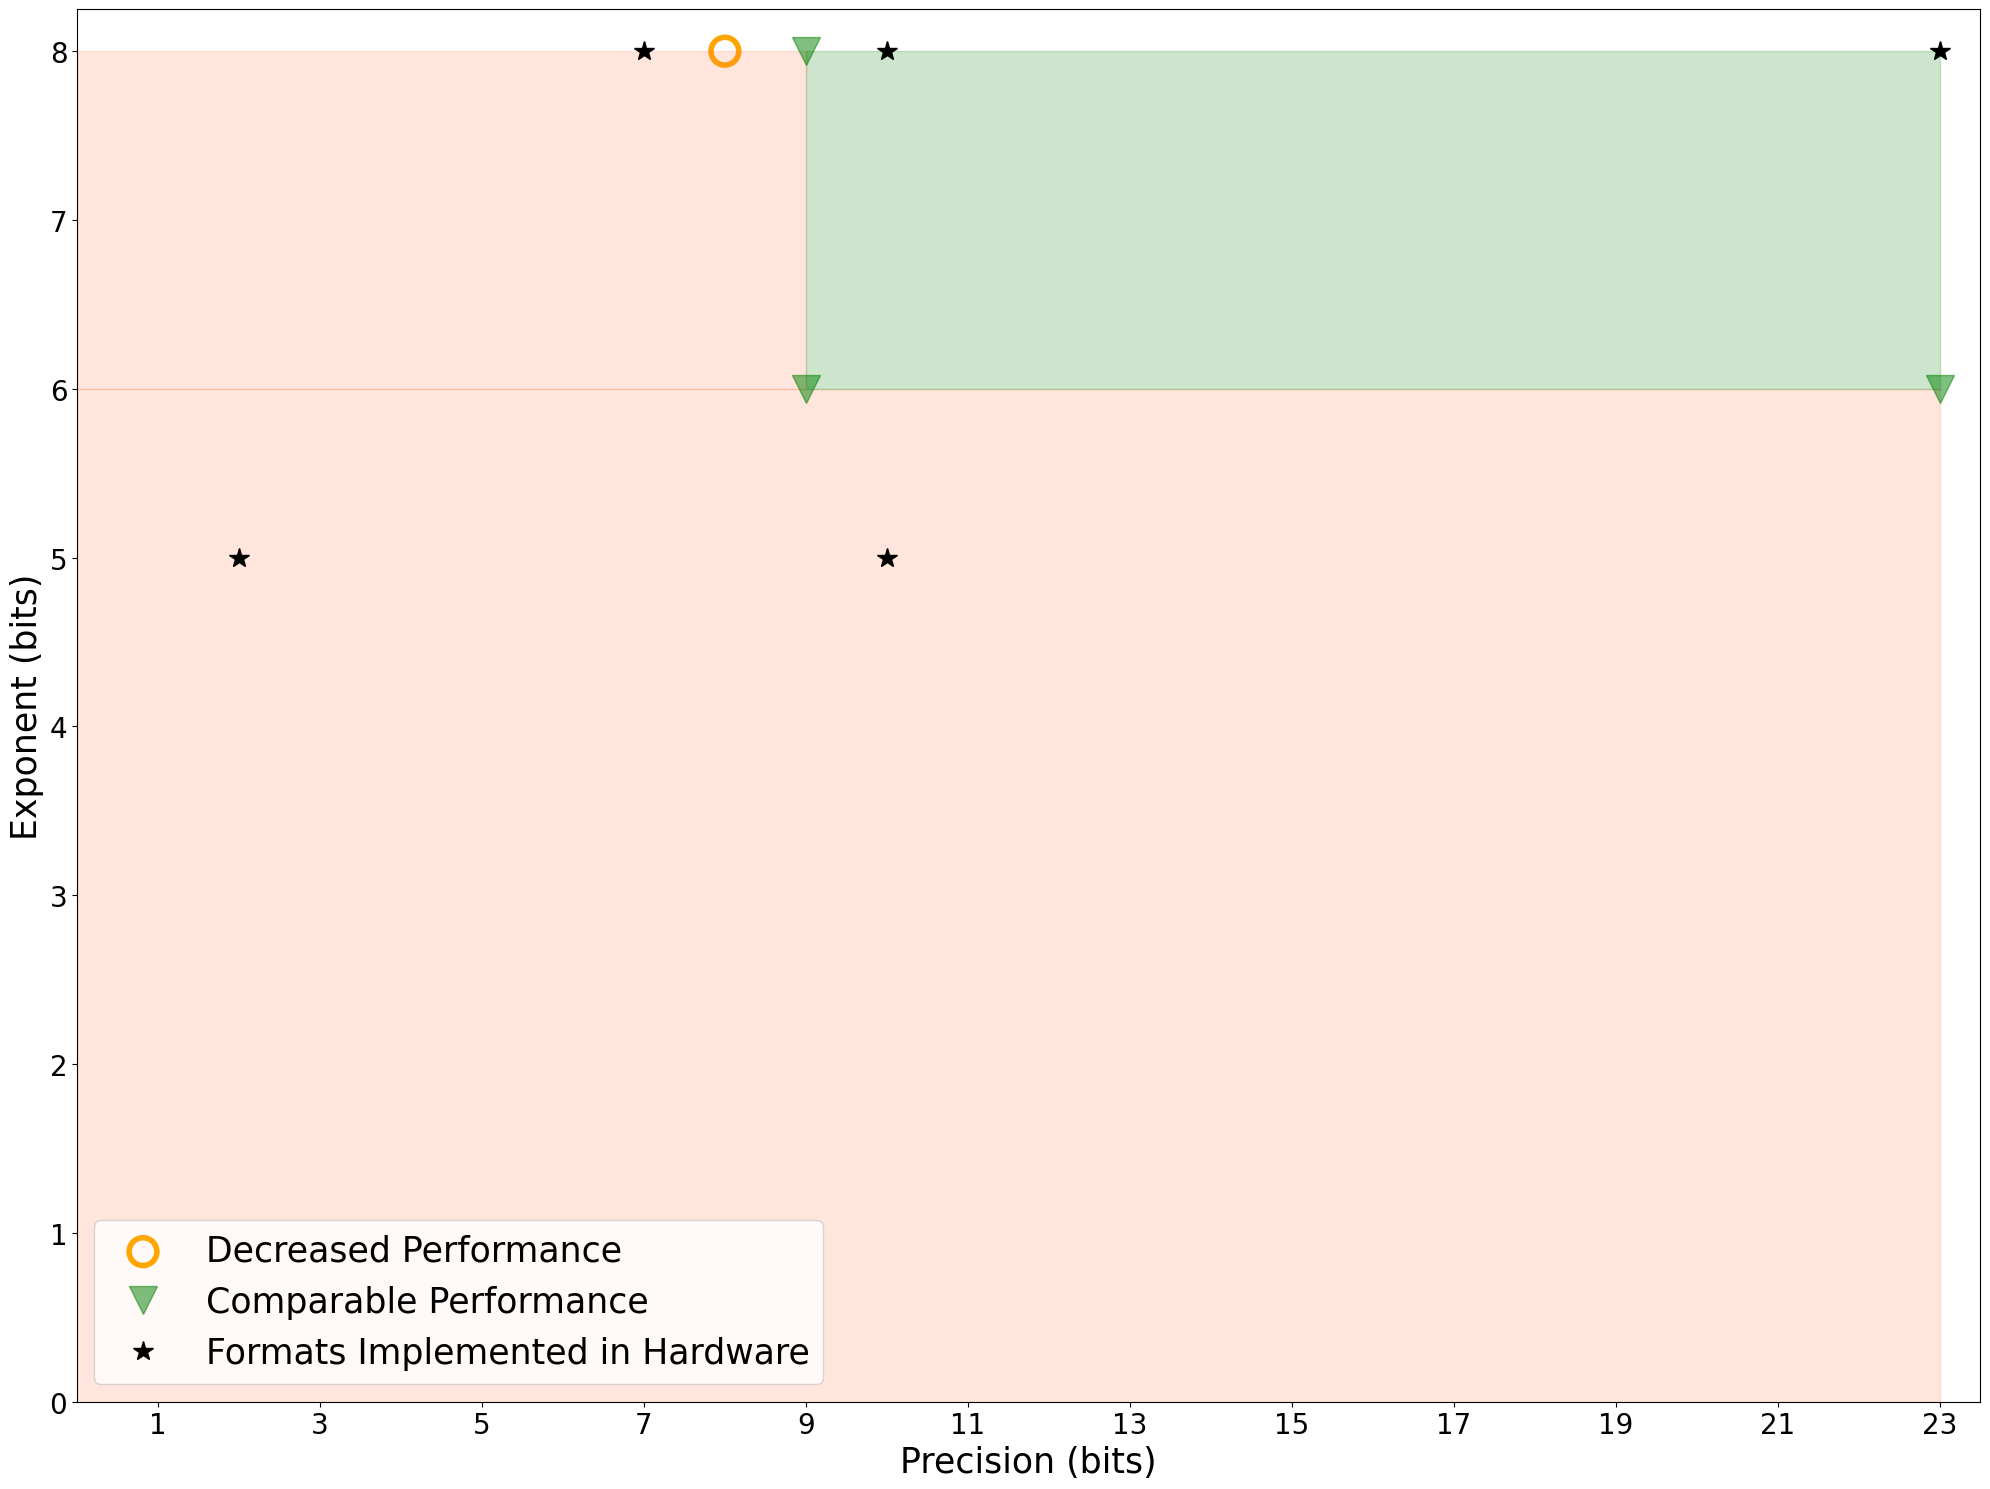

In [284]:
hardware_formats = np.array([[23,10,10,7,2], [8,5,8,8,5]])
float_success = np.array([[23,9,9], [6,6,8]])
float_decrease = np.array([[8], [8]])

fig, ax = plt.subplots(figsize=(20,15))
ax.scatter(float_decrease[0], float_decrease[1], s=400, facecolors='none', edgecolors='orange', linewidth=4, label='Decreased Performance')
ax.plot(float_success[0], float_success[1], 'gv', markersize=20, alpha=0.5, label='Comparable Performance')

ax.plot(hardware_formats[0], hardware_formats[1], "*",color='black', markersize=15, label='Formats Implemented in Hardware')
ax.legend(loc='lower left', fontsize=25), ax.set_xlabel('Precision (bits)', fontsize=25), ax.set_ylabel('Exponent (bits)', fontsize=25) #, ax.set_title('VPREC IB Search for Perfor Values')


#shade in regions
ax.fill_between(np.arange(24), np.zeros((24))+6, color='coral', alpha=0.2) #, transform=ax.get_yaxis_transform())
ax.fill_between(np.arange(9,24), np.zeros((15))+6, 8, color='green', alpha=0.2) #, transform=ax.get_yaxis_transform())
ax.fill_between(np.arange(0,10), np.zeros((10))+6, 8, color='coral', alpha=0.2) #, transform=ax.get_yaxis_transform())

plt.ylim(0, 8.25)
plt.xlim(0, 23.5)

plt.xticks(np.arange(1,24,2), fontsize=20)
plt.yticks(fontsize=20)
fig.tight_layout()

# plt.show()
plt.savefig('Figures/vprec_performance_precision_search_float.png')

In [239]:
24-9

15

In [64]:
metrics = {}
metric_stats = {}
df_metric = {}

for category in ['bp', 'cc', 'mf']:

    df_metric[category] = {}
    metrics[category] = {}
    metric_stats[category] = {}
    # for prec in [23]:

    #     for exp in [5,7]:
            
        
    # for f1 in [22,21,19,16, 13, 12, 11, 'float_7', 'double_7', 'double_8', 'double_9', 'double2_10', 
    #            'double_11', 'double_13', 'double_16', 'double_19', 'double_21']:
    for f1 in ['float_7', 'double_7', 'double2_10', 'prec_double_p23_r7', 'prec_double_p23_r6', 'prec_double_p23_r5']:

        df_metric[category][f'{f1}'] = {}
        metrics[category][f'{f1}'] = {'threshold':[], 'Smin':[], 'Fmax':[], 'AUPR':[]}
        metric_stats[category][f'{f1}'] = {'threshold':{}, 'Smin':{}, 'Fmax':{}, 'AUPR':{}}

        if 'prec' in f1: 
            metrics_file = open(f"vprec_intermediate/range/{f1.split('prec_')[-1]}_{category}.txt")
        else: metrics_file = open(f"vprec_intermediate/{f1}_{category}.txt") 
        
        next(metrics_file)
        
        for row in metrics_file:
            metric, score = row.strip().split(': ')
#             if metric == 'threshold': continue

            metrics[category][f'{f1}'][metric].append(np.float64(score))
    
    
        metrics_file = open("vprec_intermediate/full_%s.txt"%category)
#         metrics_file = open("/home/ines/Documents/Thesis/Verrou_corrected/vprec_ob/rerun/23_10_%s.txt"%category)
        next(metrics_file)
        for row in metrics_file:
#             if 'Smin threshold' in row[0] or 'Precision' in row[0] or 'Recall' in row[0] or 'Positive' in row[0] or 'Negative' in row[0] : continue
            metric, score = row.strip().split(': ')

            metric_stats[category][f'{f1}'][metric]['Original Result'] = [np.float64(score)]

        for i in metrics[category][f'{f1}']: 
            metric_stats[category][f'{f1}'][i]['VPREC Results'] = metrics[category][f'{f1}'][i]

            df_metric[category][f'{f1}']['%s'%i] = pd.DataFrame(metric_stats[category][f'{f1}'][i])


In [230]:
temp_float16 = {'mf': {
    'threshold': pd.DataFrame({'VPREC Results':[ 0.11]}),
    'Smin': pd.DataFrame({'Original Result': [13.164216],   'VPREC Results': [13.539119]}),
    'Fmax': pd.DataFrame({'Original Result': [0.474322],  'VPREC Results': [0.443903]}),
    'AUPR': pd.DataFrame({'Original Result': [0.43562],  'VPREC Results': [0.384127]})},
                'cc': {
                    'threshold': pd.DataFrame({'VPREC Results': [0.26]}),
                    'Smin': pd.DataFrame({'Original Result': [11.807527],  'VPREC Results': [11.96309]}),
                    'Fmax': pd.DataFrame({'Original Result': [0.658012],  'VPREC Results': [0.625903]}),
                    'AUPR': pd.DataFrame({'Original Result': [0.684722],  'VPREC Results': [0.623241]})},
                'bp': {
                    'threshold': pd.DataFrame({'VPREC Results': [0.14]}),
                     'Smin': pd.DataFrame({'Original Result': [49.518513],  'VPREC Results':  [50.139613]}),
                     'Fmax': pd.DataFrame({'Original Result': [0.408381],  'VPREC Results': [0.385625]}),
                     'AUPR': pd.DataFrame({'Original Result': [0.357881],  'VPREC Results': [0.321917]})}
               }

# for ont in temp_float16:
#     for metric in temp_float16[ont]:
#         temp_float16[ont][metric] 

for ont in df_metric:
    
    df_metric[ont]['23_10'] = temp_float16[ont]

## Range Option

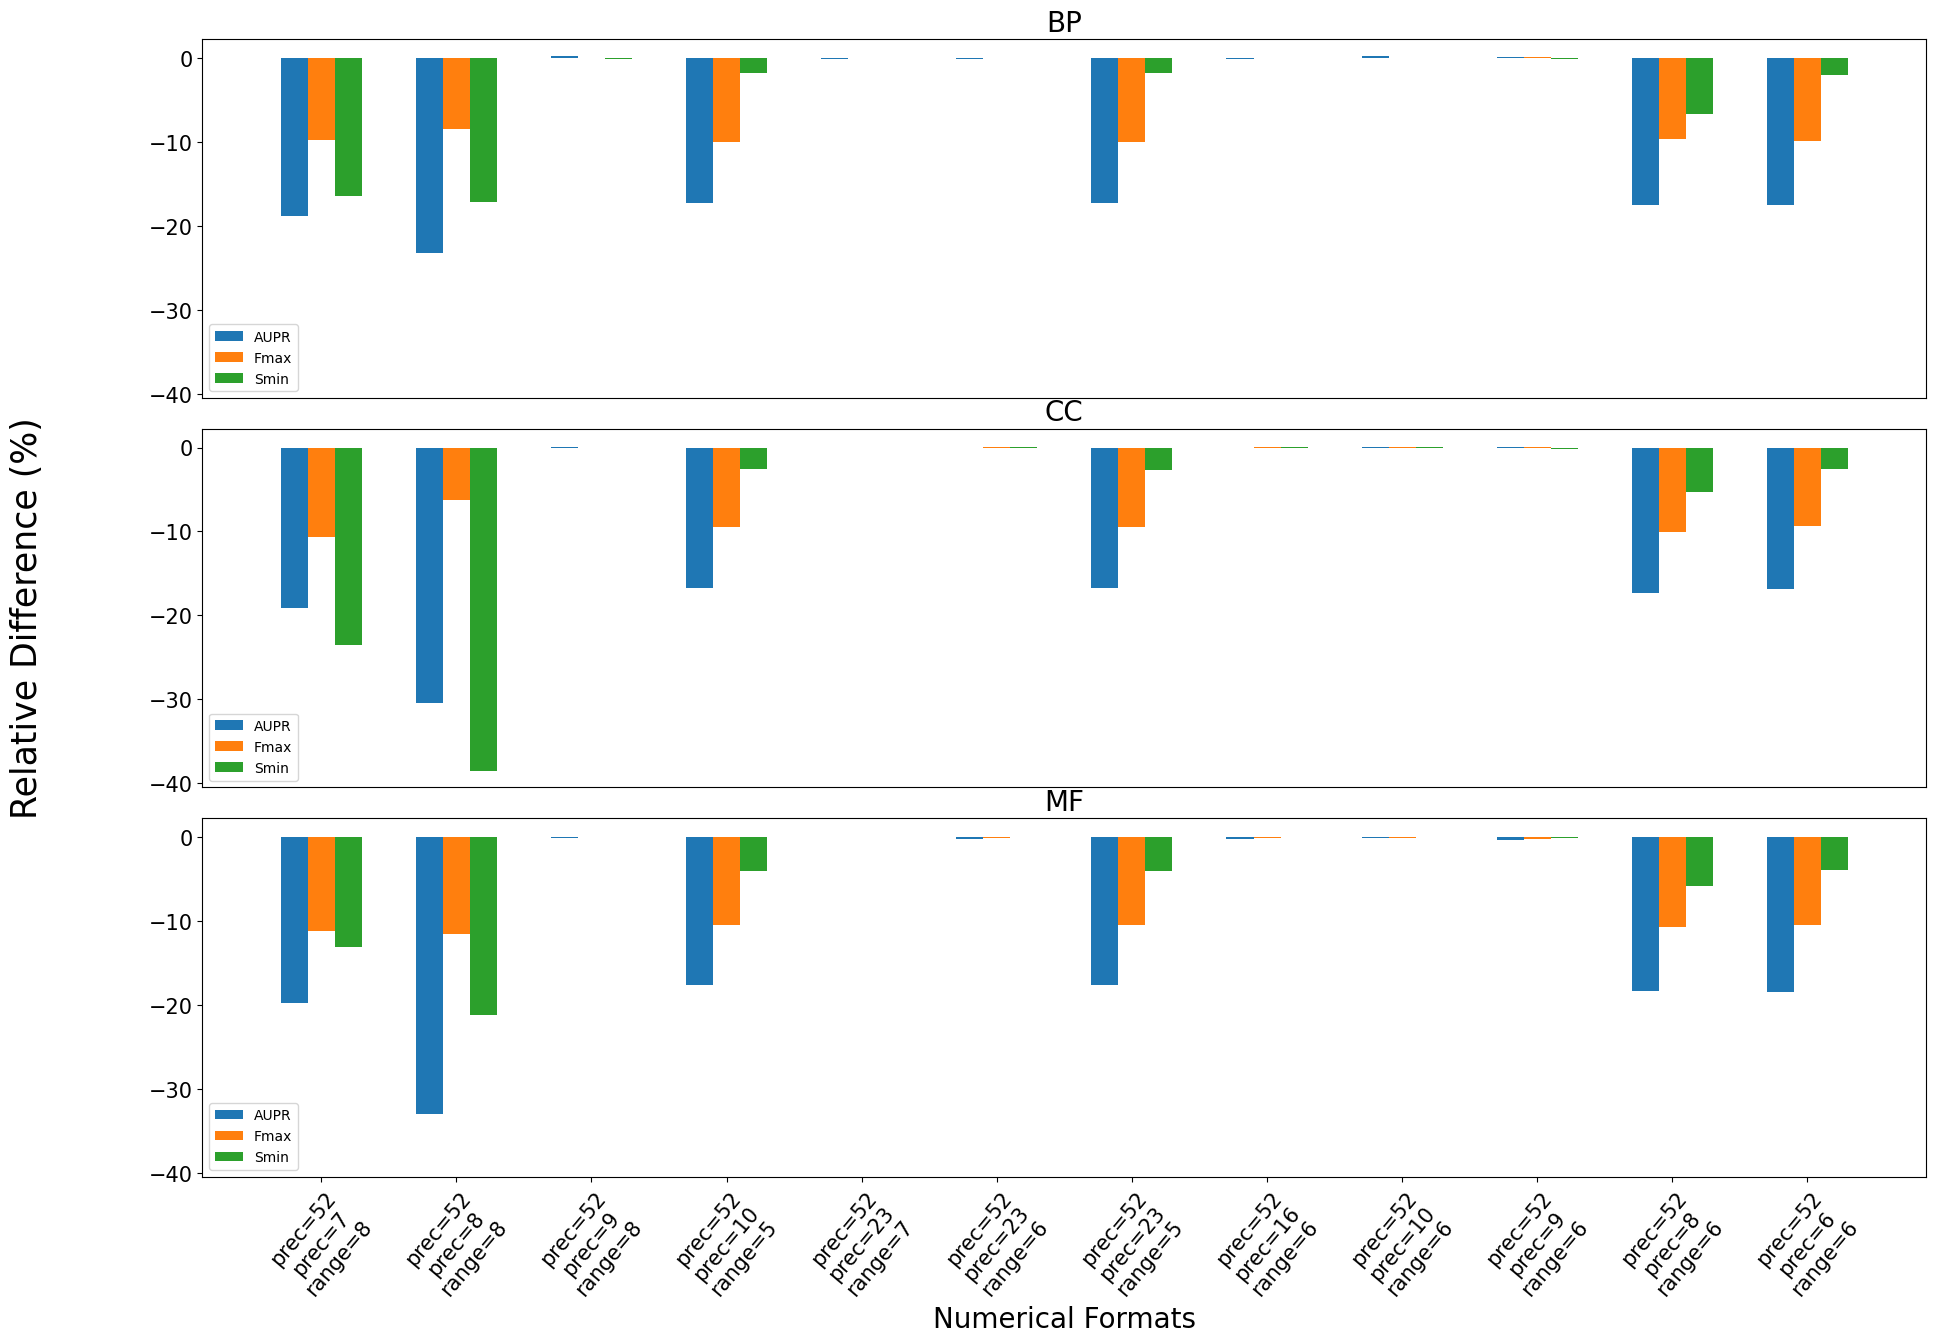

In [232]:
heatmap = {}
# reduced_preds = ['21', '19', '16', '13', '11', 'float_7', 'double_7', 'double2_10', 'double_11', 'double_13', 'double_16', 'double_19', 'double_21', '23_10'] #removed 12 + 22
# reduced_preds = ['21', '19', '16', '13', '11', 'double_10', 'double_11', 'double_13', 'double_16', 'double_19', 'double_21', '23_10'] #removed 12 + 22
# reduced_preds = ['23_10', 'float_7', 'double_7', 'double2_10', 'prec_double_p23_r7', 'prec_double_p23_r6', 'prec_double_p23_r5']
reduced_preds = ['double_7', 'double_8', 'double_9', 'double2_10', 'prec_double_p23_r7', 'prec_double_p23_r6', 'prec_double_p23_r5', 'prec_double_p16_r6', 
              'prec_double_p10_r6', 'prec_double_p9_r6', 'prec_double_p8_r6', 'prec_double_p6_r6']
temp = {'aupr':[], 'thresh':[], 'fmax':[], 'smin':[]}
x = np.arange(len(reduced_preds))
bar_width = 0.2


fig, ax = plt.subplots(3, sharex=True, sharey=True, figsize=(18, 12))
gs = fig.add_gridspec(3, hspace=0.0)

fig.tight_layout(pad=1.2)
fig.text(-0.08, 0.5, 'Relative Difference (%)', fontsize=25, va='center', rotation='vertical')

for num, category in enumerate(df_metric):

    heatmap[category] = {'smin': {'value': [], 'double': [], 'float': []},
                        'aupr': {'value': [], 'double': [], 'float': []},
                        'fmax': {'value': [], 'double': [], 'float': []}}

    
#     thresh = []
    smin = []
    fmax = []
    aupr = []
    for format_combo in reduced_preds: #df_metric[category]:
        
#         if '10_' in format_combo or '_2.' in format_combo:
# #             thresh.append(0)
#             smin.append(0)
#             fmax.append(0)
#             aupr.append(0)
#             continue

        if 'double' in format_combo:
            heatmap[category]['smin']['double'].append(52)
            heatmap[category]['fmax']['double'].append(52)
            heatmap[category]['aupr']['double'].append(52)

        else:
            heatmap[category]['smin']['double'].append(23)
            heatmap[category]['fmax']['double'].append(23)
            heatmap[category]['aupr']['double'].append(23)
        
        heatmap[category]['smin']['float'].append(format_combo.split('_')[-1])
        heatmap[category]['fmax']['float'].append(format_combo.split('_')[-1])
        heatmap[category]['aupr']['float'].append(format_combo.split('_')[-1])

            
        s_metric = ((df_metric[category][format_combo]['Smin']['Original Result'] - df_metric[category][format_combo]['Smin']['VPREC Results']).item() / df_metric[category][format_combo]['Smin']['Original Result']).item()*100
        f_metric = (-(df_metric[category][format_combo]['Fmax']['Original Result'] - df_metric[category][format_combo]['Fmax']['VPREC Results']).item() / df_metric[category][format_combo]['Fmax']['Original Result']).item()*100
        a_metric = (-(df_metric[category][format_combo]['AUPR']['Original Result'] - df_metric[category][format_combo]['AUPR']['VPREC Results']).item() / df_metric[category][format_combo]['AUPR']['Original Result']).item()*100
        
        smin.append(s_metric)
        fmax.append(f_metric)
        aupr.append(a_metric)
        
        heatmap[category]['smin']['value'].append(s_metric)
        heatmap[category]['fmax']['value'].append(f_metric)
        heatmap[category]['aupr']['value'].append(a_metric)

    
    b1 = ax[num].bar(x, aupr, width=bar_width, label='AUPR')
    b2 = ax[num].bar(x + bar_width, fmax, width=bar_width, label='Fmax')
    b3 = ax[num].bar(x + 2*bar_width, smin, width=bar_width, label='Smin')
    ax[num].legend(prop={'size': 20})
    ax[2].set_xlabel('Numerical Formats', fontsize=20)
    ax[num].set_title(category.upper(), fontsize=20)
        

#     ax[num].plot(np.arange(4)+0.3, np.zeros(4), 'rx', markevery=[3,4,5,6,7,11,15], mew=5, markersize=15)
    ax[num].set_xticks(x + bar_width), ax[num].legend()#, ax.set_title(category + ' Difference between Reduced Precision and IEEE', fontsize=15)

    ['double_7', 'double2_10', 'prec_double_p23_r7', 'prec_double_p23_r6', 'prec_double_p23_r5', 'prec_double_p16_r6', 
              'prec_double_p10_r6', 'prec_double_p6_r6']

    ax[num].set_xticklabels(['prec=52\nprec=7\nrange=8', 'prec=52\nprec=8\nrange=8', 'prec=52\nprec=9\nrange=8', 
                             'prec=52\nprec=10\nrange=5', 'prec=52\nprec=23\nrange=7', 'prec=52\nprec=23\nrange=6', 
                             'prec=52\nprec=23\nrange=5', 'prec=52\nprec=16\nrange=6', 'prec=52\nprec=10\nrange=6', 
                             'prec=52\nprec=9\nrange=6', 'prec=52\nprec=8\nrange=6', 'prec=52\nprec=6\nrange=6',], rotation=50, fontsize=35)

    temp['aupr'].append(aupr)
#     temp['thresh'].append(thresh)
    temp['fmax'].append(fmax)
    temp['smin'].append(smin)
    


for ax in fig.get_axes()[:-1]:
    ax.tick_params(bottom=False, labelbottom=False, labelsize=15)

for ax in fig.get_axes():
    ax.tick_params(labelsize=15)

# ax.text(-1.1, -38.7, 'double\n float', rotation=50, fontsize=20);


# plt.savefig('reduced_combo_ib.png', bbox_inches ="tight")

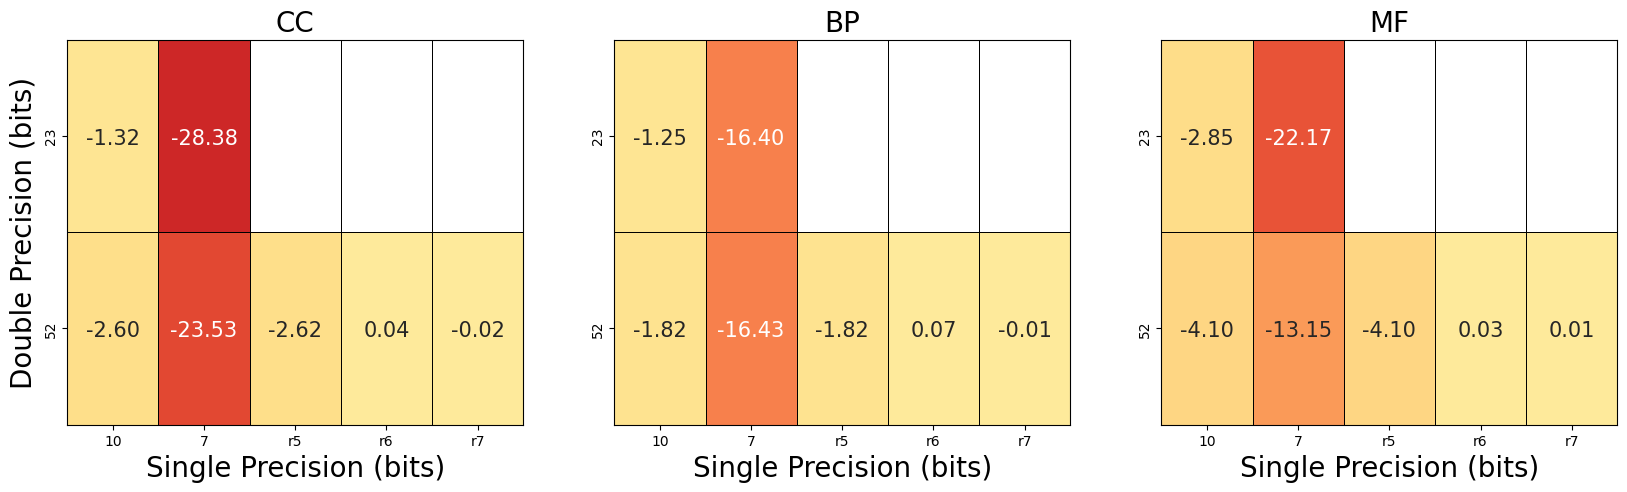

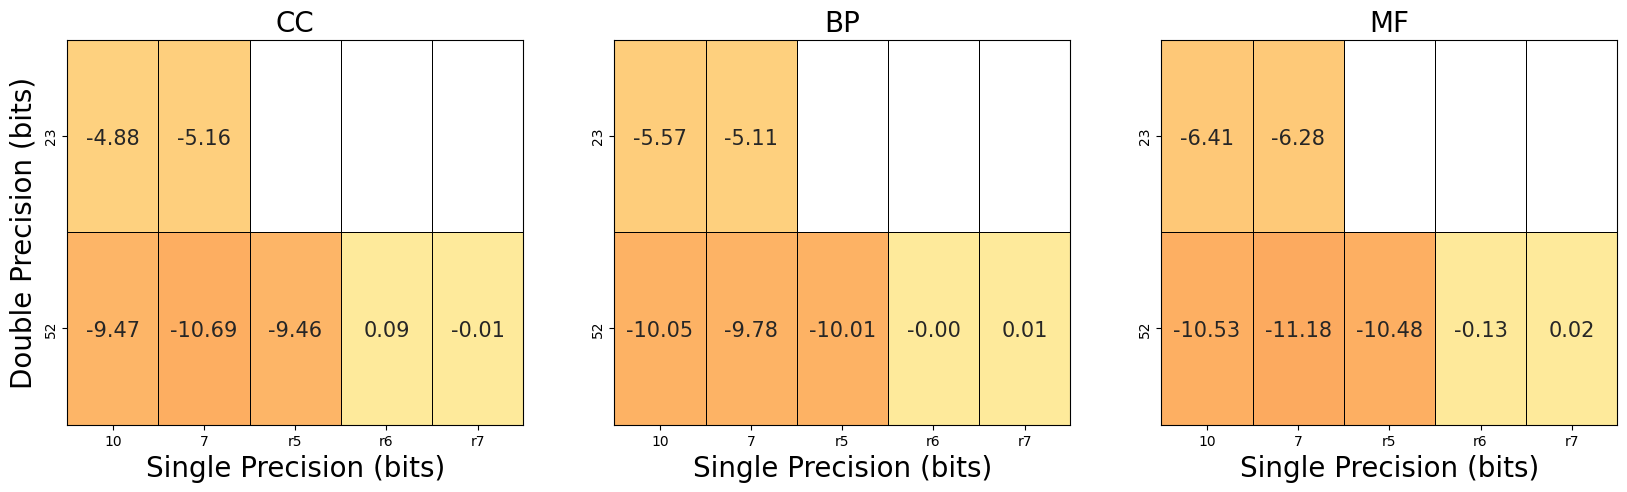

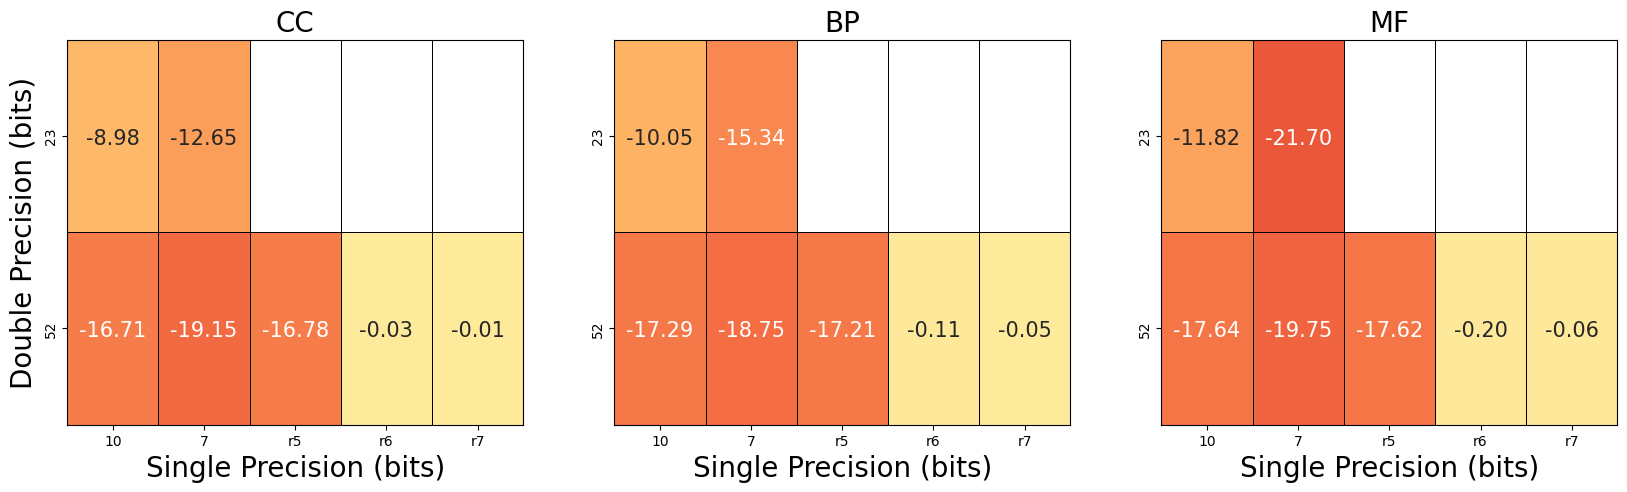

In [68]:
cmap0 = LinearSegmentedColormap.from_list('', ['red', 'green'])

for m in ['smin', 'fmax', 'aupr']:
    fig, ax = plt.subplots(1,3,squeeze=False, figsize=(20,5))
    for num, ont in enumerate(['cc', 'bp', 'mf']):
        df = pd.DataFrame(heatmap[ont][m]).pivot(index='double', columns='float', values='value')
        cols = df.columns.tolist()
        cols = cols[6:] + cols[:6]
        df = df[cols]

        annot_df = df.map(lambda f: f'{f:.2f}')

        s = sns.heatmap(
            df,
            ax=ax[0, num],
            cbar=False,
            annot=annot_df,
            fmt="",
            annot_kws={"size": 15, "va": "center_baseline"},
            cmap=asym_cmap,
            linewidth=0.5,
            linecolor="black",
            vmin=-35,
            vmax=7,
#             cbar_kws={"orientation": "horizontal"}
        )

        for _, spine in s.spines.items():
            spine.set_visible(True)

        s.set_xlabel('Single Precision (bits)', fontsize=20)
        if num == 0:
            s.set_ylabel('Double Precision (bits)', fontsize=20)
        else: s.set_ylabel("")
        s.set_title(f"{ont.upper()}", fontsize=20)
#         s.set_yticklabels([2,7,10,23], size = 20)
#         s.set_xticklabels([2,7,10,23], size = 20)

#         plt.savefig(f'Figures/ib_intermediate_reduced_{m}_heatmap.pdf', bbox_inches='tight', pad_inches=0.2)

#     break

plt.show()


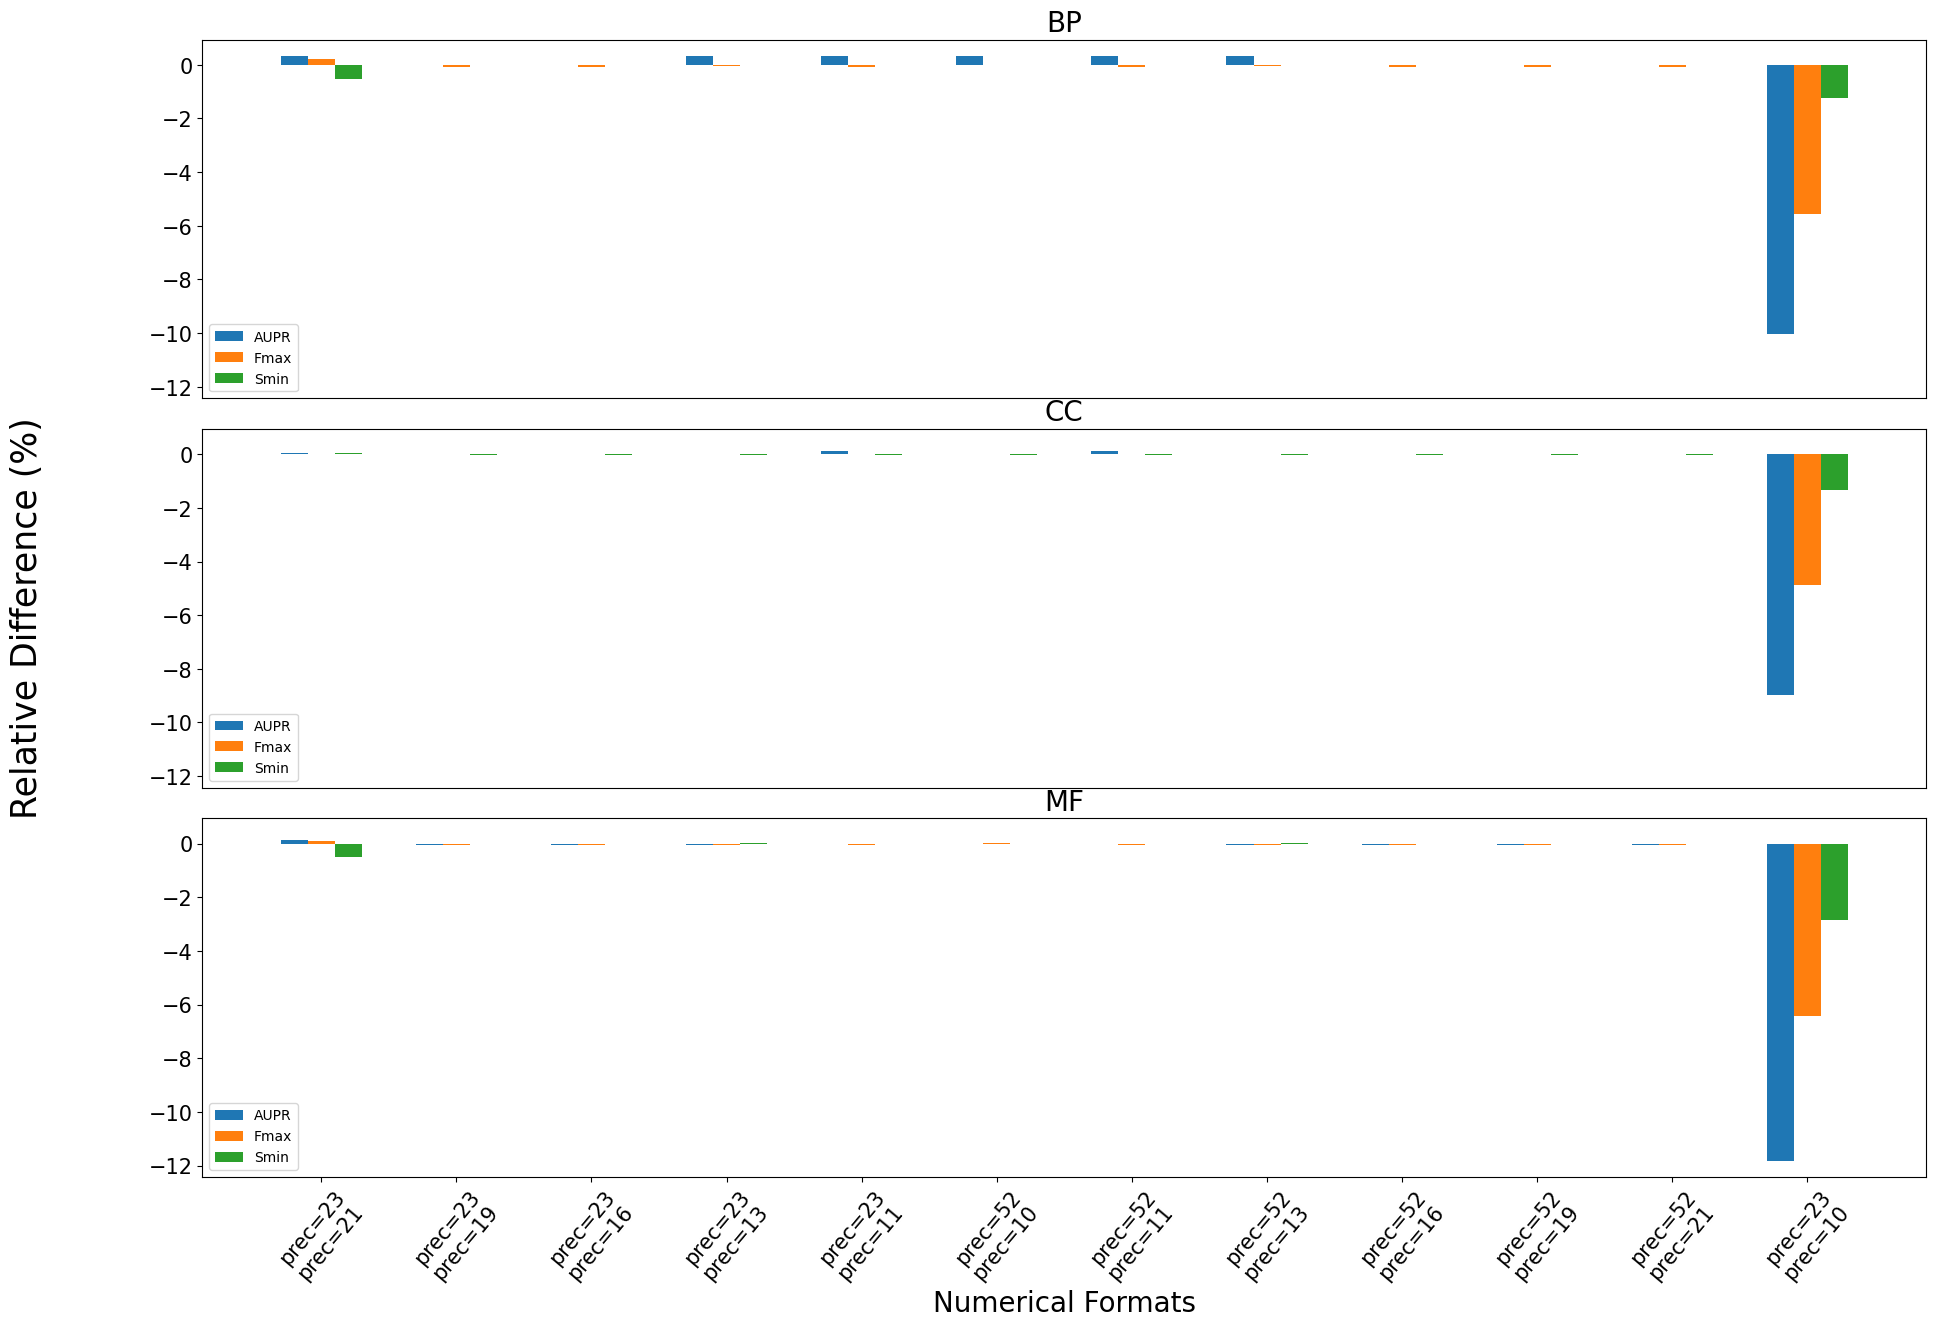

In [52]:
heatmap = {}
# reduced_preds = ['21', '19', '16', '13', '11', 'float_7', 'double_7', 'double_8', 'double_9', 'double_10', 'double_11', 'double_13', 'double_16', 'double_19', 'double_21', '23_10'] #removed 12 + 22
# reduced_preds = ['21', '19', '16', '13', '11', 'float_7', 'double_7', 'double2_10', 'double_11', 'double_13', 'double_16', 'double_19', 'double_21', '23_10'] #removed 12 + 22
reduced_preds = ['21', '19', '16', '13', '11', 'double_10', 'double_11', 'double_13', 'double_16', 'double_19', 'double_21', '23_10'] #removed 12 + 22
temp = {'aupr':[], 'thresh':[], 'fmax':[], 'smin':[]}
x = np.arange(len(reduced_preds))
bar_width = 0.2


fig, ax = plt.subplots(3, sharex=True, sharey=True, figsize=(18, 12))
gs = fig.add_gridspec(3, hspace=0.0)

fig.tight_layout(pad=1.2)
fig.text(-0.08, 0.5, 'Relative Difference (%)', fontsize=25, va='center', rotation='vertical')

for num, category in enumerate(df_metric):

    heatmap[category] = {'smin': {'value': [], 'double': [], 'float': []},
                        'aupr': {'value': [], 'double': [], 'float': []},
                        'fmax': {'value': [], 'double': [], 'float': []}}

    
#     thresh = []
    smin = []
    fmax = []
    aupr = []
    for format_combo in reduced_preds: #df_metric[category]:
        
#         if '10_' in format_combo or '_2.' in format_combo:
# #             thresh.append(0)
#             smin.append(0)
#             fmax.append(0)
#             aupr.append(0)
#             continue

        if 'double' in format_combo:
            heatmap[category]['smin']['double'].append(52)
            heatmap[category]['fmax']['double'].append(52)
            heatmap[category]['aupr']['double'].append(52)

        else:
            heatmap[category]['smin']['double'].append(23)
            heatmap[category]['fmax']['double'].append(23)
            heatmap[category]['aupr']['double'].append(23)
        
        heatmap[category]['smin']['float'].append(format_combo.split('_')[-1])
        heatmap[category]['fmax']['float'].append(format_combo.split('_')[-1])
        heatmap[category]['aupr']['float'].append(format_combo.split('_')[-1])

            
        s_metric = ((df_metric[category][format_combo]['Smin']['Original Result'] - df_metric[category][format_combo]['Smin']['VPREC Results']).item() / df_metric[category][format_combo]['Smin']['Original Result']).item()*100
        f_metric = (-(df_metric[category][format_combo]['Fmax']['Original Result'] - df_metric[category][format_combo]['Fmax']['VPREC Results']).item() / df_metric[category][format_combo]['Fmax']['Original Result']).item()*100
        a_metric = (-(df_metric[category][format_combo]['AUPR']['Original Result'] - df_metric[category][format_combo]['AUPR']['VPREC Results']).item() / df_metric[category][format_combo]['AUPR']['Original Result']).item()*100
        
        smin.append(s_metric)
        fmax.append(f_metric)
        aupr.append(a_metric)
        
        heatmap[category]['smin']['value'].append(s_metric)
        heatmap[category]['fmax']['value'].append(f_metric)
        heatmap[category]['aupr']['value'].append(a_metric)

    
    b1 = ax[num].bar(x, aupr, width=bar_width, label='AUPR')
    b2 = ax[num].bar(x + bar_width, fmax, width=bar_width, label='Fmax')
    b3 = ax[num].bar(x + 2*bar_width, smin, width=bar_width, label='Smin')
    ax[num].legend(prop={'size': 20})
    ax[2].set_xlabel('Numerical Formats', fontsize=20)
    ax[num].set_title(category.upper(), fontsize=20)
        

#     ax[num].plot(np.arange(4)+0.3, np.zeros(4), 'rx', markevery=[3,4,5,6,7,11,15], mew=5, markersize=15)
    ax[num].set_xticks(x + bar_width), ax[num].legend()#, ax.set_title(category + ' Difference between Reduced Precision and IEEE', fontsize=15)
#     ax[num].set_xticklabels(['float32\nfloat32', 'float32\nfloat16', 'float32\nbfloat16', 'float32\nbfloat8', 'float16\nfloat32', 'float16\nfloat16', 'float16\nbfloat16', 'float16\nbfloat8', 'bfloat16\nfloat32', 'bfloat16\nfloat16', 'bfloat16\nbfloat16', 'bfloat16\nbfloat8', 'bfloat8\nfloat32', 'bfloat8\nfloat16', 'bfloat8\nbfloat16', 'bfloat8\nbfloat8'], rotation=50, fontsize=35);
#     ax[num].set_xticklabels(['prec=23\nprec=21', 'prec=23\nprec=19', 'prec=23\nprec=16', 'prec=23\nprec=13', 
#                              'prec=23\nprec=11', 'prec=23\nprec=7', 'prec=52\nprec=7', 'prec=52\nprec=8', 
#                              'prec=52\nprec=9', 'prec=52\nprec=10', 'prec=52\nprec=11', 'prec=52\nprec=13',
#                              'prec=52\nprec=16', 'prec=52\nprec=19', 'prec=52\nprec=21', 'prec=23\nprec=10'], rotation=50, fontsize=35)
    # ax[num].set_xticklabels(['prec=23\nprec=21', 'prec=23\nprec=19', 'prec=23\nprec=16', 'prec=23\nprec=13', 
    #                          'prec=23\nprec=11', 'prec=23\nprec=7', 'prec=52\nprec=7', 'prec=52\nprec=10', 
    #                          'prec=52\nprec=11', 'prec=52\nprec=13', 'prec=52\nprec=16', 'prec=52\nprec=19', 
    #                          'prec=52\nprec=21', 'prec=23\nprec=10'], rotation=50, fontsize=35)

    ax[num].set_xticklabels(['prec=23\nprec=21', 'prec=23\nprec=19', 'prec=23\nprec=16', 'prec=23\nprec=13', 
                             'prec=23\nprec=11', 'prec=52\nprec=10', 
                             'prec=52\nprec=11', 'prec=52\nprec=13', 'prec=52\nprec=16', 'prec=52\nprec=19', 
                             'prec=52\nprec=21', 'prec=23\nprec=10'], rotation=50, fontsize=35)

    temp['aupr'].append(aupr)
#     temp['thresh'].append(thresh)
    temp['fmax'].append(fmax)
    temp['smin'].append(smin)
    


for ax in fig.get_axes()[:-1]:
    ax.tick_params(bottom=False, labelbottom=False, labelsize=15)

for ax in fig.get_axes():
    ax.tick_params(labelsize=15)

# ax.text(-1.1, -38.7, 'double\n float', rotation=50, fontsize=20);


# plt.savefig('reduced_combo_ib.png', bbox_inches ="tight")

-11.820623479179103 0.333237752964963


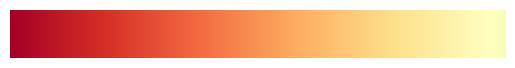

In [53]:
def normalize(x,a,b): #normalization map: [a,b] --> [0,1]
    if a>b:
        raise ValueError('(a,b) is not an interval')
    return (float(x)-a)/(b-a)

def display_cmap(cmap):
    plt.imshow(np.linspace(0, 100, 256)[None, :],  aspect=25, interpolation='nearest', cmap=cmap) 
    plt.axis('off')
    
def asymmetric_cmap(data, div_cmap, ref_point=0.0, name= 'asym_cmap'):
    '''
    Input
    -----
      data: data to be visualized (a numpy aray of shape (m,n), a data frame, a list of lists of equal len)
      div_cmap :  a diverging matplotlib or seaborn colormap  (a matplotlib.colors.LinearSegmentedColormap object)
      ref_point is the reference point for data, the threshold of interest  
    '''
    if isinstance(data, pd.DataFrame):
        D = data.values
    elif isinstance(data, np.ma.core.MaskedArray):
        D=np.ma.copy(data)
    else:    
        D=np.asarray(data, dtype=float) 
    D=np.ma.masked_invalid(D)
#     print(D)
    
    dmin=np.min(D)
    dmax=np.max(D)
    print(dmin, dmax)
    
    if not (dmin < ref_point < dmax):
        raise ValueError('data are not appropriate for visualization with a diverging colormap')
        
    if dmax-ref_point > ref_point-dmin:
        left=2*ref_point-dmax
        right=dmax
        
        tp=normalize(dmin, left,right)#normalized value of dmin
        refp_norm=normalize(ref_point, left, right) # normalized value of the ref_point in the symmetric interval
                                                   #[left, right]. It is 0.5 
       
        A=tp
        B=1.0
    else:
        left=dmin
        right=2*ref_point-dmin
        
        tp=normalize(dmax, left, right)#normalized value of dmax
        refp_norm=normalize(ref_point, left, right)
        
        A=0.0
        B=tp
    max_lumin_idx=normalize(refp_norm, A, B) # index for the max luminance position in the asymm div cmap
    
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # T is a (256,)  array 
    T = np.hstack([
        np.linspace(A, refp_norm, 128, endpoint=False), 
        np.linspace(refp_norm, B, 128)
    ])
   
    # T_assym is (256,) array 
    T_asymm = np.hstack([
        np.linspace(0, max_lumin_idx, 128, endpoint=False), 
        np.linspace(max_lumin_idx, 1.0, 128)
    ])

    for t, s in zip(T, T_asymm):
#         print(t)
        r, g, b, a = div_cmap(t)
#         print(r,g,b,a)

        cdict['red'].append((s, r, r))
        cdict['green'].append((s, g, g))
        cdict['blue'].append((s, b, b))
        cdict['alpha'].append((s, a, a))

    asym_cmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    # plt.register_cmap(cmap=asym_cmap)
    display_cmap(asym_cmap)
    return D, asym_cmap, dmin, dmax

def rand_lower_correl(n, a, b, dtype=float):
    if b<a:
        raise ValueError('b must be greater than a')
    nr=  n * (n + 1) / 2 - n
    A = np.zeros([n, n], dtype=dtype)
    A[np.tril_indices(n, -1)] = a+(b-a)*np.random.random(int(nr))
    return A

# mask = np.zeros_like(C, dtype=bool)
# mask[np.triu_indices_from(mask)] = True
# C=rand_lower_correl(25, -0.4, 0.9)
# C = np.ma.array(C, mask=mask)  #mask out the upper triangle in C

cmap1=matplotlib.colormaps['RdYlGn']
cbar = []
for ont in ['cc', 'mf', 'bp']:
    for m in ['smin', 'fmax', 'aupr']:
#         print(heatmap[ont][m]['value'])
        cbar.append(list(heatmap[ont][m]['value']))
        
cbar = np.array(cbar)

plot_data, asym_cmap=asymmetric_cmap(cbar, cmap1, ref_point=0)[:2]

/tmp/ipykernel_31217/365321442.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = df.applymap(lambda f: f'{f:.2f}')
/tmp/ipykernel_31217/365321442.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = df.applymap(lambda f: f'{f:.2f}')
/tmp/ipykernel_31217/365321442.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = df.applymap(lambda f: f'{f:.2f}')
/tmp/ipykernel_31217/365321442.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = df.applymap(lambda f: f'{f:.2f}')
/tmp/ipykernel_31217/365321442.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = df.applymap(lambda f: f'{f:.2f}')
/tmp/ipykernel_31217/365321442.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_df = df.applymap(lambda f: f'{f:.2f}'

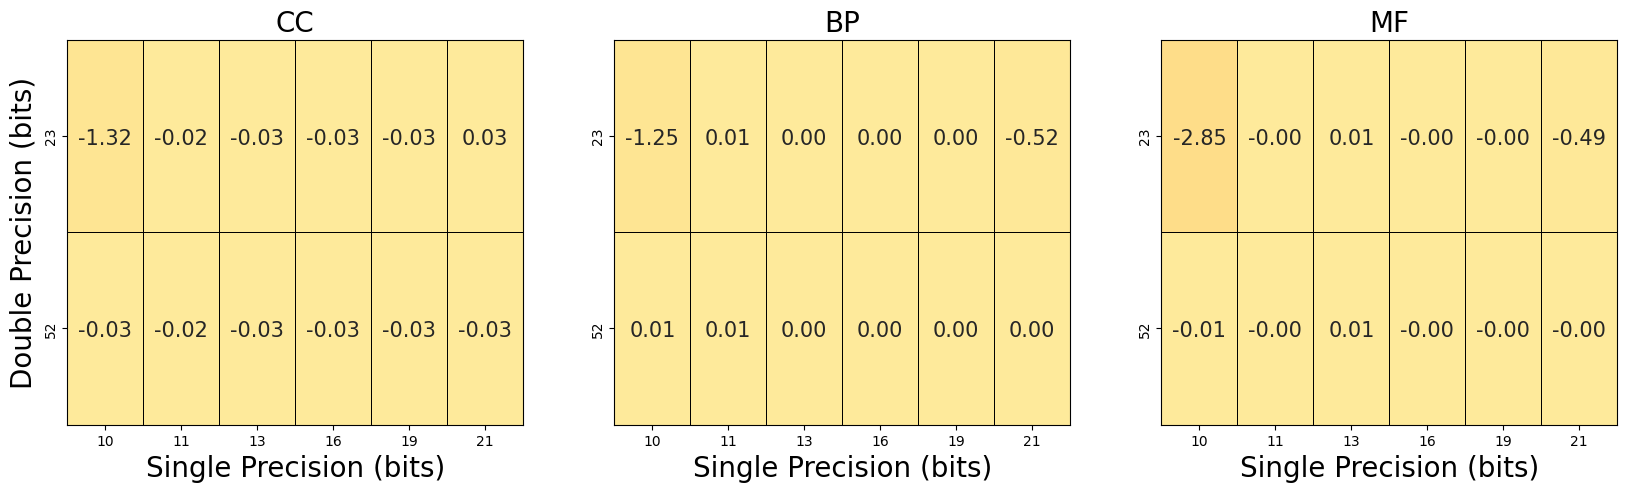

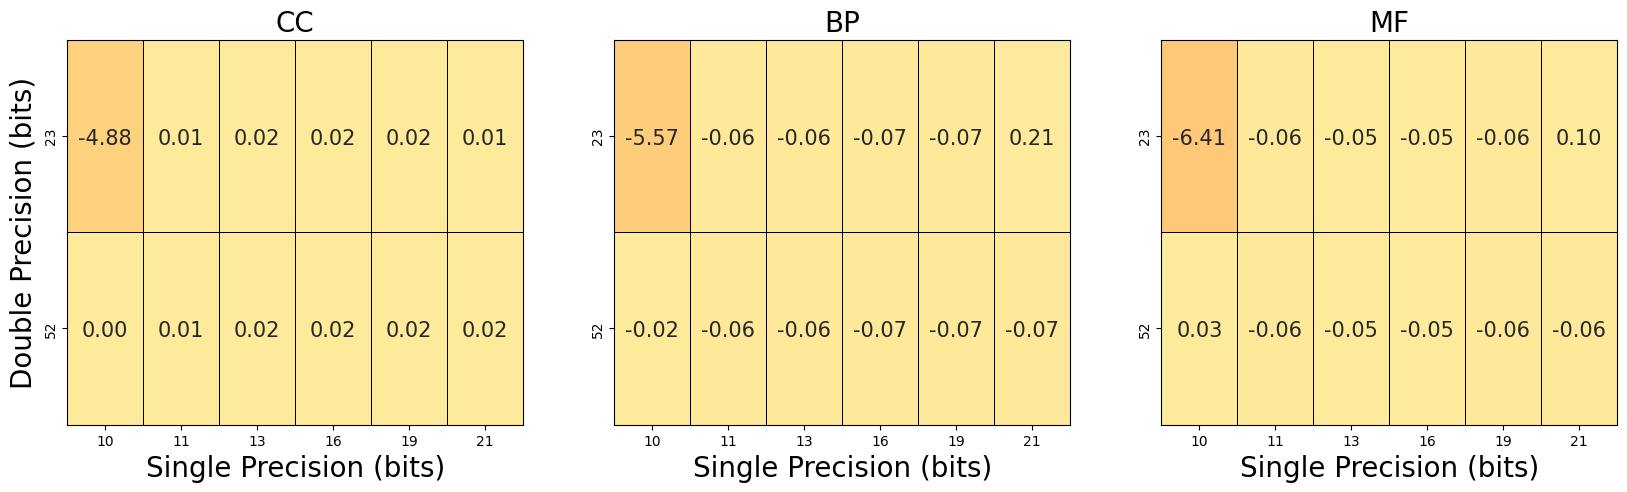

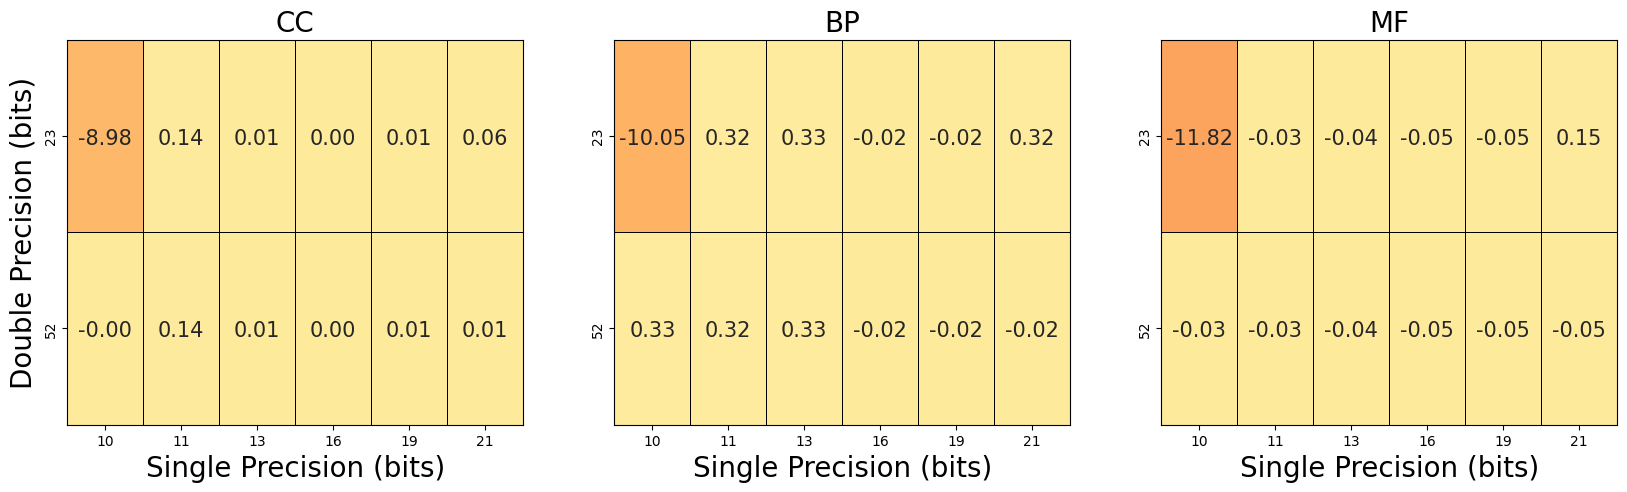

In [54]:
cmap0 = LinearSegmentedColormap.from_list('', ['red', 'green'])

for m in ['smin', 'fmax', 'aupr']:
    fig, ax = plt.subplots(1,3,squeeze=False, figsize=(20,5))
    for num, ont in enumerate(['cc', 'bp', 'mf']):
        df = pd.DataFrame(heatmap[ont][m]).pivot(index='double', columns='float', values='value')
        cols = df.columns.tolist()
        cols = cols[6:] + cols[:6]
        df = df[cols]

        annot_df = df.applymap(lambda f: f'{f:.2f}')

        s = sns.heatmap(
            df,
            ax=ax[0, num],
            cbar=False,
            annot=annot_df,
            fmt="",
            annot_kws={"size": 15, "va": "center_baseline"},
            cmap=asym_cmap,
            linewidth=0.5,
            linecolor="black",
            vmin=-35,
            vmax=7,
#             cbar_kws={"orientation": "horizontal"}
        )

        for _, spine in s.spines.items():
            spine.set_visible(True)

        s.set_xlabel('Single Precision (bits)', fontsize=20)
        if num == 0:
            s.set_ylabel('Double Precision (bits)', fontsize=20)
        else: s.set_ylabel("")
        s.set_title(f"{ont.upper()}", fontsize=20)
#         s.set_yticklabels([2,7,10,23], size = 20)
#         s.set_xticklabels([2,7,10,23], size = 20)

#         plt.savefig(f'Figures/ib_intermediate_reduced_{m}_heatmap.pdf', bbox_inches='tight', pad_inches=0.2)

#     break

plt.show()
